In [1]:
# muldrow analysis

In [2]:
import geopandas as gpd
import os
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import rioxarray

In [3]:
geo_crop_dir = './import_data/import_sar_asf_script/sar_images_geocoded_cropped'

In [4]:
muldrow = gpd.read_file('./import_data/import_glacier_shapefiles_rgi/rgi_data/muldrow_glacier.geojson')

In [5]:
file_list = []
date_list = []
for file in os.listdir(geo_crop_dir):
    if file != '.ipynb_checkpoints':
        file_list.append(file)
        date = file[14:22]
        date_list.append(date)

<ipython-input-6-4ee14e2a45db>:4: RuntimeWarning: divide by zero encountered in log
  ax[i].imshow(np.log(sar_image))
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


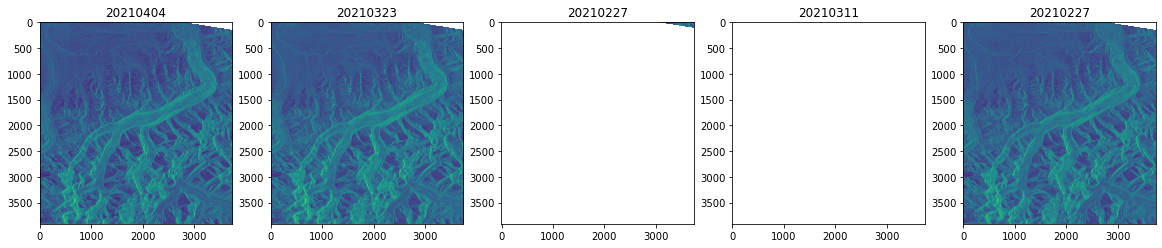

In [6]:
f,ax=plt.subplots(1,len(file_list),figsize=(20,20))
for i,file in enumerate(file_list):
    sar_image = plt.imread(f'{geo_crop_dir}/{file}')
    ax[i].imshow(np.log(sar_image))
    ax[i].set_title(date_list[i])

/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


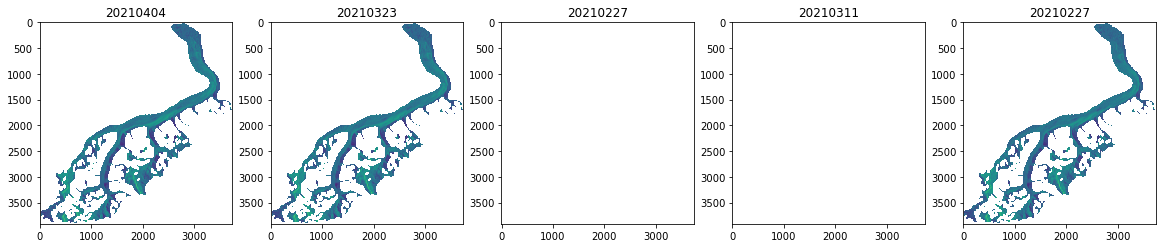

In [7]:
f,ax=plt.subplots(1,len(file_list),figsize=(20,20))
for i,file in enumerate(file_list):
    sar_image = rioxarray.open_rasterio(f'{geo_crop_dir}/{file}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False)
    #sar_image.plot(ax=ax[i])
    sar_image = sar_image.squeeze()
    ax[i].imshow(np.log(sar_image))
    ax[i].set_title(date_list[i])

In [8]:
#TODO: increase date ranges, sort by date, time series animation